# geoData Background  

This is the subset of first part about game market information collection that aims for ploting game companies world mapping, which in order to connect geo infos with game company dataset and visulize in R plot.

The code below shows the workflow about explore Geo API testing(but not used in project), and connect datasets for visualization.

### 1, Geo API quering testing

data resouce from https://data.linz.govt.nz/layer/53353-nz-street-address/webservices/

In [3]:
# import library
library(httr)
library(jsonlite)
library(httr)
library(rvest)
library(dplyr)
library(rlist)

Loading required package: xml2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Setting the parameters for my query
key <- "key=a2bb37563751424195b95cbce72eb24d"
layer <- "layer=53353"  
x <- "x=172.6332999999969"
y <- "y=-43.53330000000021"
max_results <- "max_results=100" # limitation of 100 quering per time
radius <- "radius=1000"
geometry <- "geometry=true"
with_field_names <- "with_field_names=true"

In [5]:
# reform the basic url with queies
url <- paste("https://data.linz.govt.nz/services/query/v1/vector.json?",
             key,
             layer,
             x,
             y,
             max_results,
             radius,
             geometry,
             with_field_names,
             sep = "&")

In [6]:
# check if the get Status: 200
response <- GET(url)
response

Response [https://data.linz.govt.nz/services/query/v1/vector.json?&key=a2bb37563751424195b95cbce72eb24d&layer=53353&x=172.6332999999969&y=-43.53330000000021&max_results=100&radius=1000&geometry=true&with_field_names=true]
  Date: 2020-10-22 08:58
  Status: 200
  Content-Type: application/vnd.koordinates.vectorQuery+json
  Size: 94.3 kB
<BINARY BODY>
NULL

In [7]:
my_content <- toJSON(fromJSON(content(response, as="text")), pretty = TRUE)
result <- fromJSON(my_content)

No encoding supplied: defaulting to UTF-8.



In [8]:
# have a preview of data structure
glimpse(result$vectorQuery$layers$`53353`)

List of 4
 $ crs        :List of 2
  ..$ type      : chr "name"
  ..$ properties:List of 1
  .. ..$ name: chr "EPSG:4326"
 $ field_names: chr [1:23] "address_id" "change_id" "address_type" "unit_value" ...
 $ type       : chr "FeatureCollection"
 $ features   :'data.frame':	100 obs. of  5 variables:
  ..$ geometry  :'data.frame':	100 obs. of  2 variables:
  .. ..$ type       : chr [1:100] "Point" "Point" "Point" "Point" ...
  .. ..$ coordinates:List of 100
  ..$ distance  : int [1:100] 28 44 60 70 78 79 80 83 85 85 ...
  ..$ type      : chr [1:100] "Feature" "Feature" "Feature" "Feature" ...
  ..$ properties:'data.frame':	100 obs. of  18 variables:
  .. ..$ address_id           : int [1:100] 1755506 1757454 219847 2107808 2107813 2107865 2107809 1755502 2107814 220250 ...
  .. ..$ change_id            : int [1:100] 1474036 4901363 4903098 2958008 2958013 2958184 2958009 1474032 2958014 4901367 ...
  .. ..$ address_type         : chr [1:100] "Road" "Road" "Road" "Road" ...
  .. ..$ addr

In [12]:
# looking for the data.frame that may need
glimpse(result$vectorQuery$layers$`53353`$features) 

Rows: 100
Columns: 5
$ geometry   <df[,2]> <data.frame[26 x 2]>
$ distance   <int> 28, 44, 60, 70, 78, 79, 80, 83, 85, 85, 89, 90, 90, 91, 93…
$ type       <chr> "Feature", "Feature", "Feature", "Feature", "Feature", "Fe…
$ properties <df[,18]> <data.frame[26 x 18]>
$ id         <int> 4391328, 6265520, 6264998, 5983736, 5983741, 5983771, 5983…


In [10]:
glimpse(result$vectorQuery$layers$`53353`$features$geometry) 

Rows: 100
Columns: 2
$ type        <chr> "Point", "Point", "Point", "Point", "Point", "Point", "Po…
$ coordinates <list> [<172.6331, -43.5331>, <172.6338, -43.5333>, <172.6339, …


In [14]:
# try to find the data frame with useful columns of gd2000_xcoord,gd2000_ycoord
glimpse(result$vectorQuery$layers$`53353`$features$properties) 

Rows: 100
Columns: 18
$ address_id            <int> 1755506, 1757454, 219847, 2107808, 2107813, 210…
$ change_id             <int> 1474036, 4901363, 4903098, 2958008, 2958013, 29…
$ address_type          <chr> "Road", "Road", "Road", "Road", "Road", "Road",…
$ address_number        <int> 88, 78, 100, 79, 79, 122, 79, 100, 79, 88, 126,…
$ suburb_locality       <chr> "Christchurch Central", "Christchurch Central",…
$ town_city             <chr> "Christchurch", "Christchurch", "Christchurch",…
$ full_address_number   <chr> "88", "78", "100", "1/79", "2/79", "122", "101/…
$ full_road_name        <chr> "Cambridge Terrace", "Cashel Street", "Oxford T…
$ full_address          <chr> "88 Cambridge Terrace, Christchurch Central, Ch…
$ road_section_id       <int> 37106, 44872, 38654, 44872, 44872, 44864, 44872…
$ gd2000_xcoord         <dbl> 172.6331, 172.6338, 172.6339, 172.6341, 172.634…
$ gd2000_ycoord         <dbl> -43.5331, -43.5333, -43.5337, -43.5330, -43.533…
$ suburb_locality_ascii <chr> 

In [17]:
# assemble the data frame 
df <- list.stack(list.select(result,result$vectorQuery$layers$`53353`))
summary(df)

 V1.Length    V1.Class    V1.Mode  
  2          -none-      list      
 23          -none-      character 
  1          -none-      character 
  5          data.frame  list      

In [18]:
# show demo in a table
df <- as.data.frame(result$vectorQuery$layers$`53353`$features$properties)
head(df)

,address_id,change_id,address_type,address_number,suburb_locality,town_city,full_address_number,full_road_name,full_address,road_section_id,gd2000_xcoord,gd2000_ycoord,suburb_locality_ascii,town_city_ascii,full_road_name_ascii,full_address_ascii,unit_value,address_number_suffix
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1755506,1474036,Road,88,Christchurch Central,Christchurch,88,Cambridge Terrace,"88 Cambridge Terrace, Christchurch Central, Christchurch",37106,172.6331,-43.5331,Christchurch Central,Christchurch,Cambridge Terrace,"88 Cambridge Terrace, Christchurch Central, Christchurch",NA,NA
2,1757454,4901363,Road,78,Christchurch Central,Christchurch,78,Cashel Street,"78 Cashel Street, Christchurch Central, Christchurch",44872,172.6338,-43.5333,Christchurch Central,Christchurch,Cashel Street,"78 Cashel Street, Christchurch Central, Christchurch",NA,NA
3,219847,4903098,Road,100,Christchurch Central,Christchurch,100,Oxford Terrace,"100 Oxford Terrace, Christchurch Central, Christchurch",38654,172.6339,-43.5337,Christchurch Central,Christchurch,Oxford Terrace,"100 Oxford Terrace, Christchurch Central, Christchurch",NA,NA
4,2107808,2958008,Road,79,Christchurch Central,Christchurch,1/79,Cashel Street,"1/79 Cashel Street, Christchurch Central, Christchurch",44872,172.6341,-43.5330,Christchurch Central,Christchurch,Cashel Street,"1/79 Cashel Street, Christchurch Central, Christchurch",1,NA
5,2107813,2958013,Road,79,Christchurch Central,Christchurch,2/79,Cashel Street,"2/79 Cashel Street, Christchurch Central, Christchurch",44872,172.6342,-43.5330,Christchurch Central,Christchurch,Cashel Street,"2/79 Cashel Street, Christchurch Central, Christchurch",2,NA
6,2107865,2958184,Road,122,Christchurch Central,Christchurch,122,Oxford Terrace,"122 Oxford Terrace, Christchurch Central, Christchurch",44864,172.6341,-43.5329,Christchurch Central,Christchurch,Oxford Terrace,"122 Oxford Terrace, Christchurch Central, Christchurch",NA,NA


In [19]:
# save into write.csv
write.csv(df,"geoData.csv")

In [20]:
# import library for plotting
library(leaflet)
library(ggplot2)

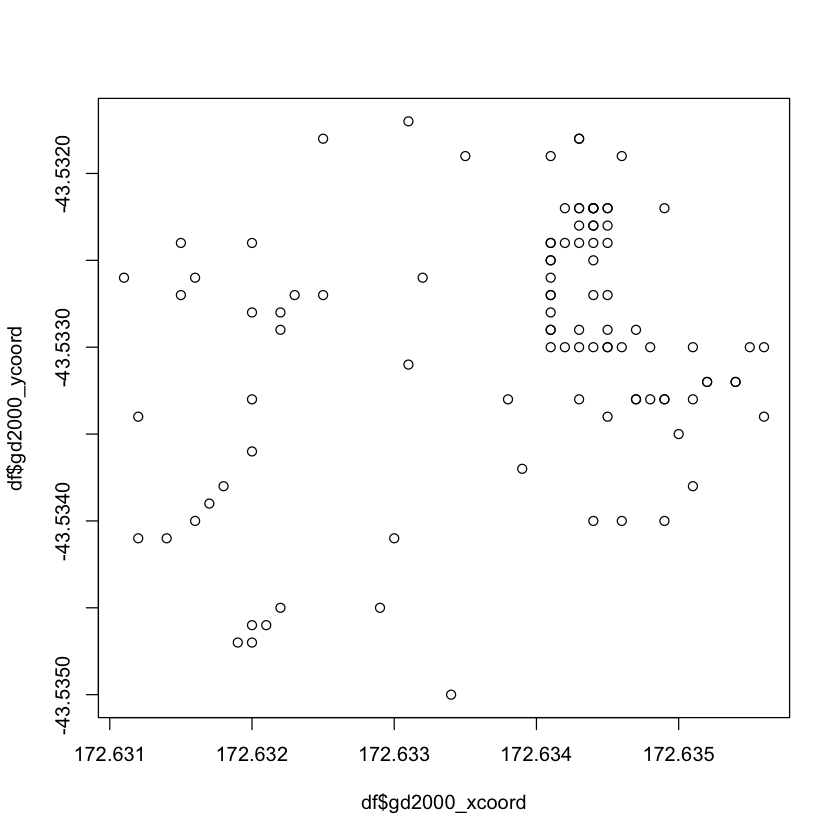

In [20]:
# plot in longitude and latitude
plot(df$gd2000_xcoord,df$gd2000_ycoord)

In [22]:
#install.packages("maps")
library(maps)

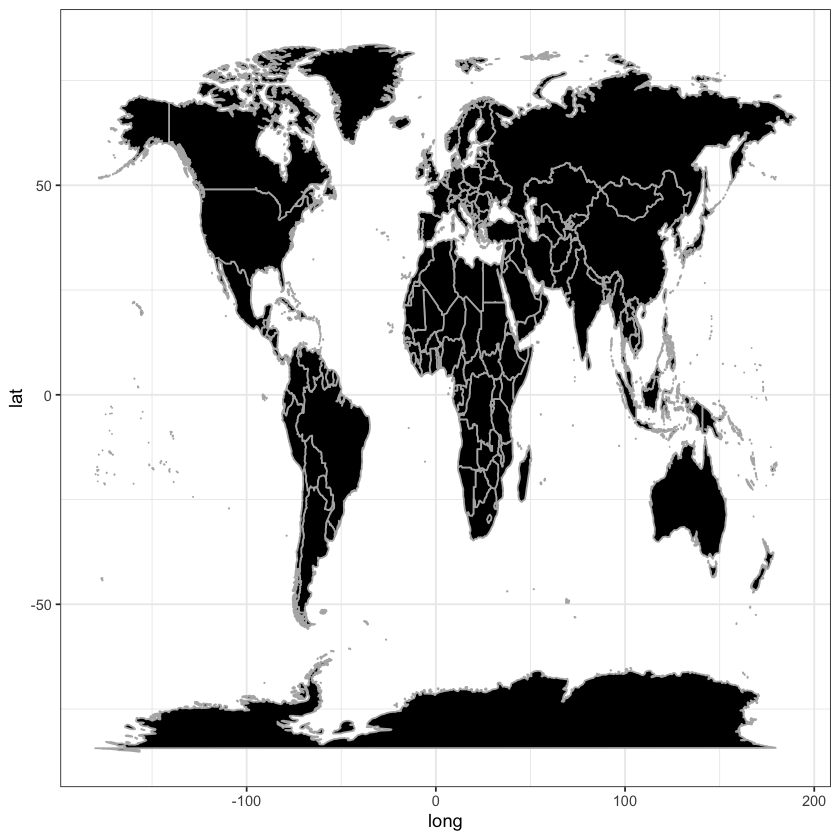

In [23]:
MyMap <- ggplot() + borders("world", colour="grey70", fill="black") + theme_bw()
MyMap

Warning message:
“Use of `df$gd2000_xcoord` is discouraged. Use `gd2000_xcoord` instead.”
Warning message:
“Use of `df$gd2000_ycoord` is discouraged. Use `gd2000_ycoord` instead.”


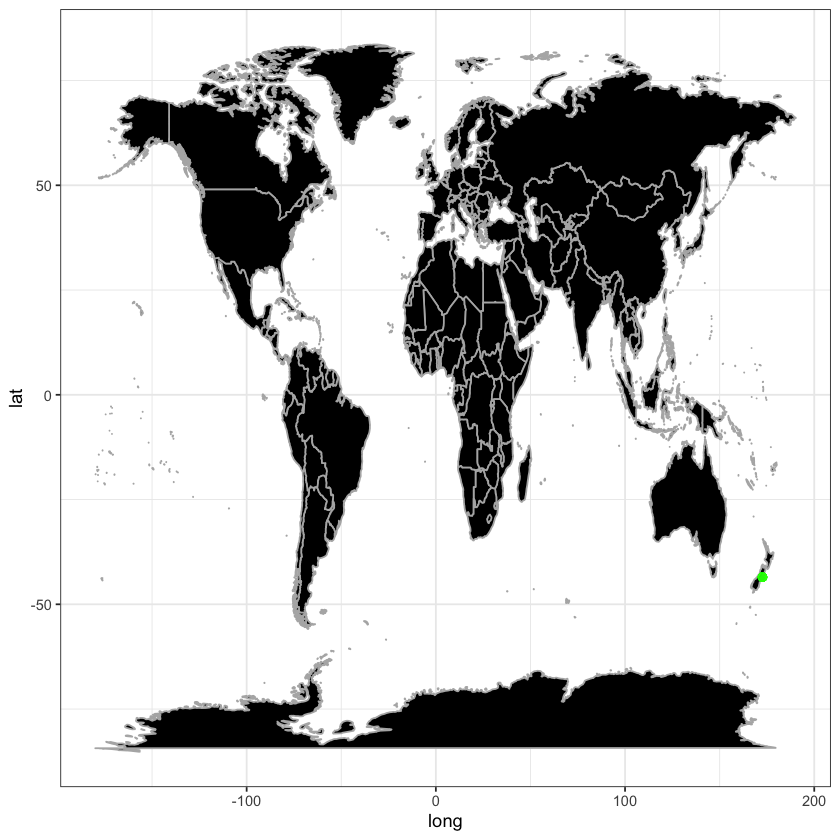

In [24]:
MyMap <- MyMap + geom_point(aes(x=df$gd2000_xcoord,y=df$gd2000_ycoord),data=df,colour="green",size=2,alpha=0.1)
MyMap

Warning message:
“Use of `df$gd2000_xcoord` is discouraged. Use `gd2000_xcoord` instead.”
Warning message:
“Use of `df$gd2000_ycoord` is discouraged. Use `gd2000_ycoord` instead.”


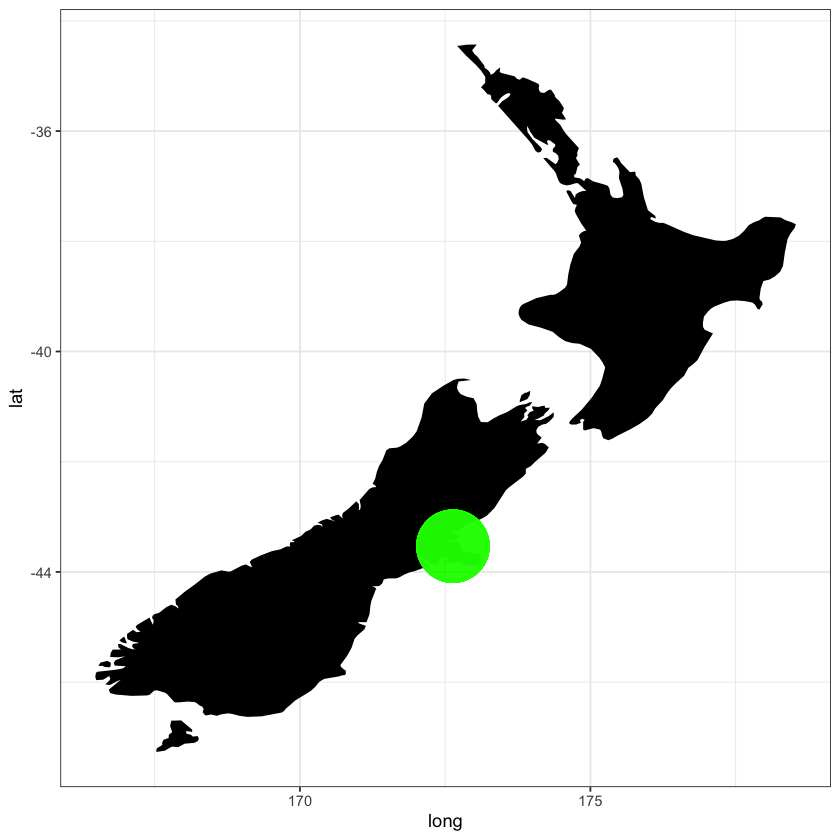

In [25]:
# zoom in to location what we need ("x=172.6332999999969", "y=-43.53330000000021")
MyMap <- ggplot() + borders("world", colour=NA, fill="black",
                            geom_point(aes(x=df$gd2000_xcoord,y=df$gd2000_ycoord), data=df, colour="green",
                            size=20, alpha=0.1) + theme_bw()
MyMap 

### 2, connect datasets for visualization.

In [21]:
# import libaray
library(ggplot2)
library(dplyr, warn.conflicts = FALSE)
library(tidyr)
library(plotly, warn.conflicts = FALSE)

In [30]:
# import the combine datasets
countryCode_df <- read.csv(file = "countries.csv")
game_companies_df <- read.csv(file = "game_companies.csv")

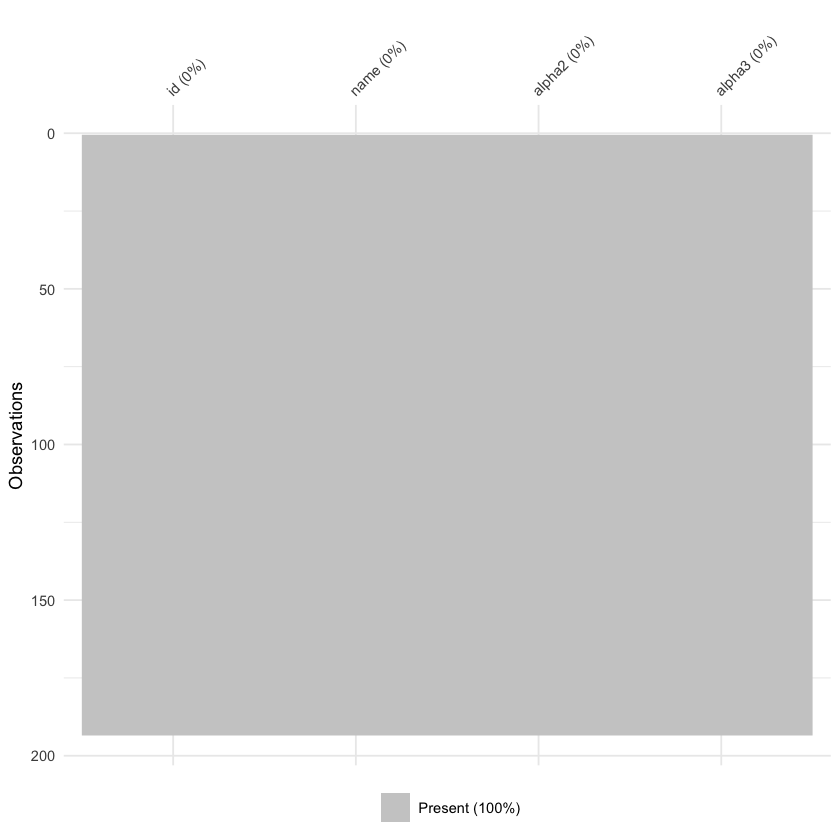

In [31]:
# visulization the missing values
naniar::vis_miss(countryCode_df)

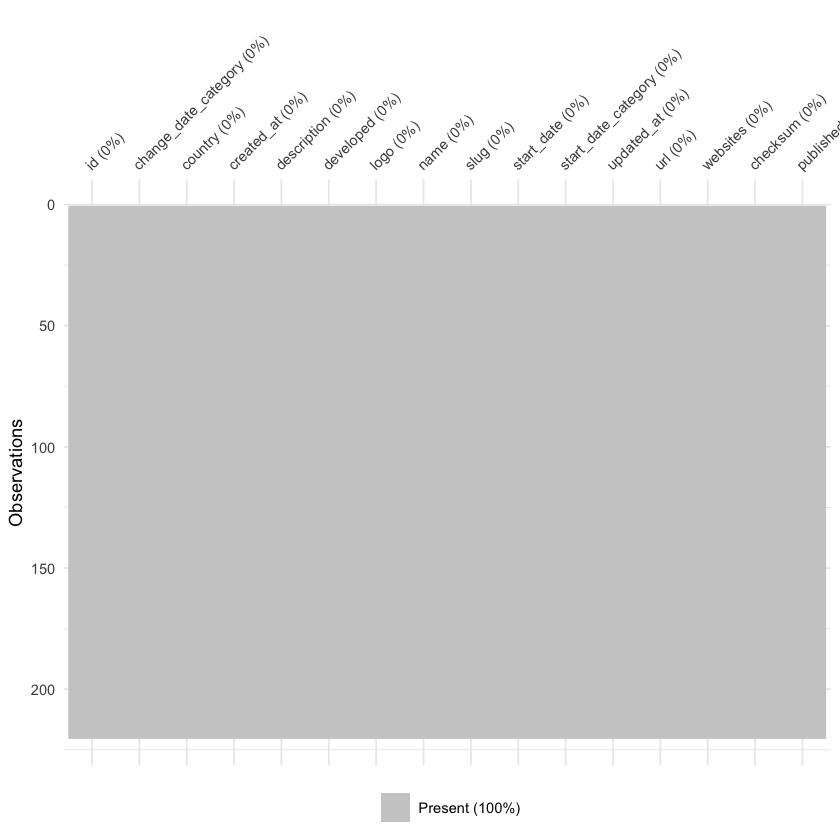

In [41]:
naniar::vis_miss(game_companies_df)

In [43]:
# remove the null values
geo_df <- game_companies_test_df %>% 
    select(id, country) %>% 
    filter(country != "Null") 

head(geo_df)

,id,country
,<int>,<fct>
1,8,840
2,70,392
3,14329,840
4,213,250
5,104,250
6,245,840


In [45]:
# merge two date sets
merge_df <- merge(geo_df, countryCode_df, by.x="country", by.y="id",sort = TRUE)
head(merge_df)

,country,id,name,alpha2,alpha3
,<fct>,<int>,<fct>,<fct>,<fct>
1,124,1639,Canada,ca,can
2,124,7912,Canada,ca,can
3,124,1111,Canada,ca,can
4,124,1013,Canada,ca,can
5,124,1005,Canada,ca,can
6,124,5542,Canada,ca,can


In [56]:
# group the merge data by country names, and count the target company numbers in each country
df<- merge_df %>%
    group_by(name)%>% 
    tally() %>% 
    arrange(desc(n))
head(df)

name,n
<fct>,<int>
United States of America,65
Japan,21
United Kingdom of Great Britain and Northern Ireland,11
Canada,10
France,6
Poland,6


In [42]:
# visulize the mapping in R plotly
# however, there is not successful since there is an issue for plotting R plotly within the jupyter lab
# the following code still be useful in Rstudio 
map_gragh <- plot_geo(df,locationmode = "country names",frame = ~n)%>% 
                      add_trace(locations = ~df$name, z = ~n,text = ~df$name)
#map_gragh

![title](pic/map_gragh.png)

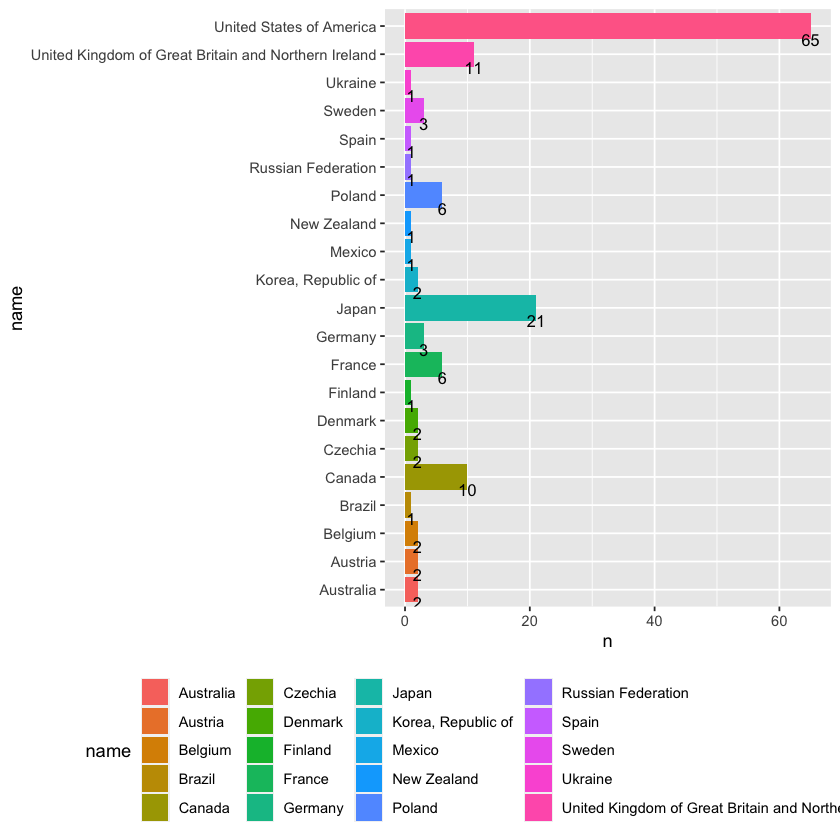

In [78]:
# alternative in ggplot, Bar Plot to review the distribution
bar_plot <- ggplot(data=df, aes(x=name, y=n, fill=name)) + 
                    geom_bar(stat="identity")+
                    geom_text(aes(x=name, label=n), vjust=1.6, color="black", size=3.5)+
                    theme(legend.position="bottom")+
                    coord_flip()
bar_plot